In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'
import networkx as nx
#import castle
from castle.common import GraphDAG, independence_tests
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, GES, ICALiNGAM, GOLEM
from collections import OrderedDict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

2023-08-16 19:41:25,375 - C:\Users\succa\Desktop\Ph.D\Research\Guns_scaling\Guns9\Github\Supplement_Causal\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [2]:
merged_df = pd.read_csv("../Clean_data/SAMIs_5_Variables.csv")

In [3]:
pc_dataset = np.array(merged_df[["Firearm Prevalence","Armed_Robberies","Homicides","Fireaarm  licenses","Firearm Homicides"]])

2023-08-16 19:41:25,667 - C:\Users\succa\anaconda3\lib\site-packages\numba\core\transforms.py[line:58] - INFO: finding looplift candidates


0 1 [] 0.07215661313651456 0.0
0 2 [] 0.1299374300292877 0.0
0 3 [] 0.04654518496335314 0.0
0 4 [] 0.1641911315050848 0.0
1 2 [] 0.13088149813744465 0.0
1 3 [] 0.014805841447497414 0.02
1 4 [] 0.14057501297926667 0.0
2 3 [] 0.007420884989076448 0.2239
2 4 [] 1.2129127667476722 0.0


2023-08-16 19:55:50,295 - C:\Users\succa\anaconda3\lib\site-packages\numba\core\transforms.py[line:58] - INFO: finding looplift candidates


3 4 [] 0.005221124762705642 0.3986
0 1 [2] 0.01739968622369137 0.0018
0 1 [3] 0.05424951386360899 0.0
0 1 [4] 0.01231338608508814 0.0921
0 2 [3] 0.112849335396068 0.0
0 2 [4] -0.0006509883079415246 0.8948
0 3 [4] 0.036481621349999216 0.0
0 4 [3] 0.14014818465491263 0.0
1 2 [3] 0.10541981380264964 0.0
1 2 [4] 0.0032670044814198107 0.3774
1 3 [4] 0.009943509925565586 0.162


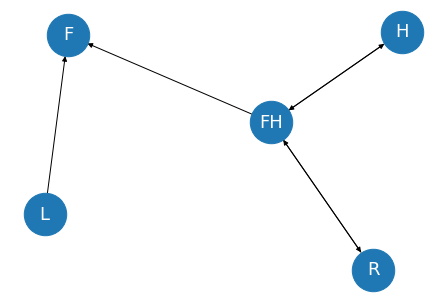

In [4]:
pc_MI = PC(ci_test = "CMI_Knn")
pc_MI.learn(pc_dataset)
learned_graph_MI = nx.DiGraph(pc_MI.causal_matrix)

# Relabel the nodes
MAPPING_MI  = {k: v for k, v in zip(range(5), ["F","R","H","L","FH"])}
learned_graph_MI  = nx.relabel_nodes(learned_graph_MI, MAPPING_MI, copy=True)

# Plot the graph
nx.draw(
    learned_graph_MI, 
    with_labels=True,
    node_size=1800,
    font_size=18,
    font_color='white'
)